# INFO BASICA

# LIBRERIAS

In [6]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [7]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [8]:
# Leo los indicadores

indicadores = pd.read_excel('./data/Serie de indicadores Macro.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Citi Economic Surprise - USA'])

indicadores.columns = ['Date','Citi']
indicadores['Date'] = pd.to_datetime(indicadores['Date'], format="%Y-%m-%d")
indicadores = indicadores.set_index('Date')
indicadores = indicadores.loc['2015-04-30':,:]

In [9]:
# Veo una muestra

indicadores.head(10)

,Citi
Date,
2015-04-30,-62.2
2015-05-01,-62.3
2015-05-04,-56.1
2015-05-05,-65.3
2015-05-06,-67.3
2015-05-07,-64.7
2015-05-08,-64.3
2015-05-11,-61.0
2015-05-12,-59.5


In [10]:
# Leo los indicadores

SP500 = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja3', 
                           usecols=['Date', 'SP500'])

SP500.columns = ['Date','Precio']
SP500['Date'] = pd.to_datetime(SP500['Date'], format="%Y-%m-%d")
SP500 = SP500.set_index('Date')
SP500 = SP500.loc['2015-04-30':,:]
SP500 = SP500.applymap(lambda x: x/1.1285216494845334)

In [11]:
SP500.head()

,Precio
Date,
2015-04-30,1848.001765
2015-05-01,1868.187465
2015-05-04,1873.681379
2015-05-05,1851.501919
2015-05-06,1843.252188


In [12]:
SP500

,Precio
Date,
2015-04-30,1848.001765
2015-05-01,1868.187465
2015-05-04,1873.681379
2015-05-05,1851.501919
2015-05-06,1843.252188
2015-05-07,1850.208191
2015-05-08,1875.108024
2015-05-11,1865.564565
2015-05-12,1860.061791


In [13]:
# Escojo el Standar & Poors 500 y lo uno al indicador

SP500_final = SP500.merge(indicadores, how='inner', on='Date')

In [14]:
# Veo una muestra

SP500_final.head(20)

,Precio,Citi
Date,,
2015-04-30,1848.001765,-62.2
2015-05-01,1868.187465,-62.3
2015-05-04,1873.681379,-56.1
2015-05-05,1851.501919,-65.3
2015-05-06,1843.252188,-67.3
2015-05-07,1850.208191,-64.7
2015-05-08,1875.108024,-64.3
2015-05-11,1865.564565,-61.0
2015-05-12,1860.061791,-59.5


In [15]:
# Calculo la rentabilidad, lo hago mediante la variación porcentual de un día a otro

SP500_final['Rentabilidad'] = SP500_final.Precio.pct_change() * 100
SP500_final.Rentabilidad = SP500_final.Rentabilidad.fillna(0)

In [16]:
# Visualizo una muestra

SP500_final.head(20)

,Precio,Citi,Rentabilidad
Date,,,
2015-04-30,1848.001765,-62.2,0.000000
2015-05-01,1868.187465,-62.3,1.092299
2015-05-04,1873.681379,-56.1,0.294077
2015-05-05,1851.501919,-65.3,-1.183737
2015-05-06,1843.252188,-67.3,-0.445570
2015-05-07,1850.208191,-64.7,0.377377
2015-05-08,1875.108024,-64.3,1.345785
2015-05-11,1865.564565,-61.0,-0.508955
2015-05-12,1860.061791,-59.5,-0.294966


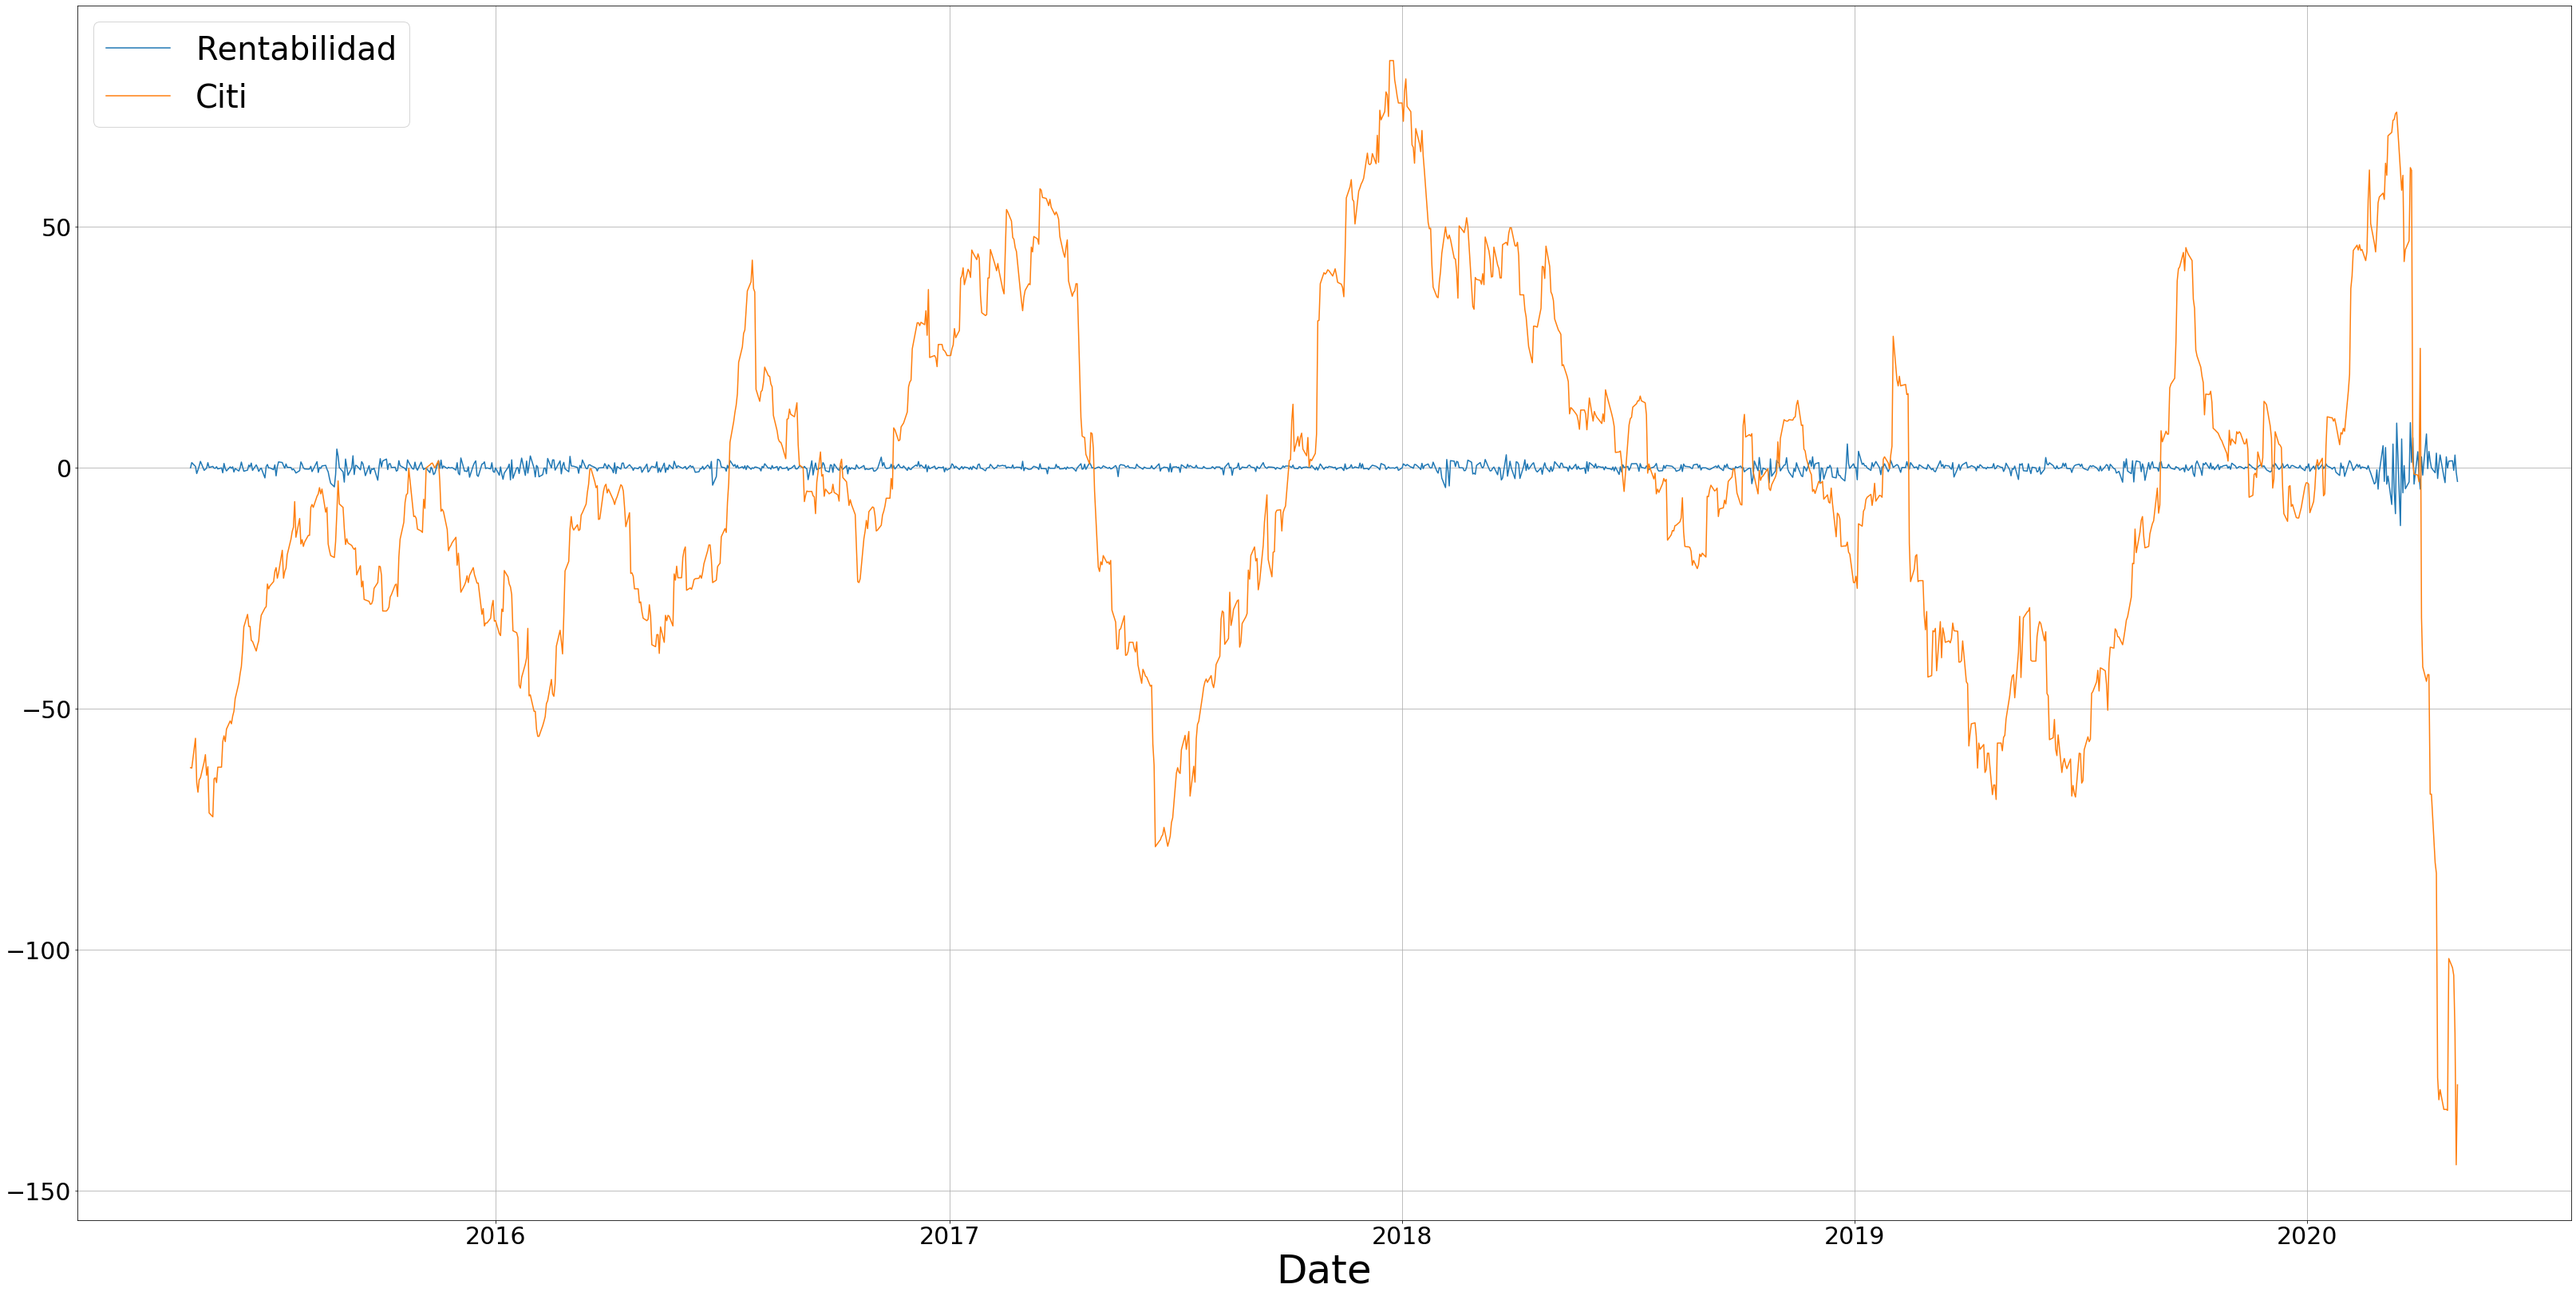

In [17]:
# Ploteo la rentabilidad y el Citi

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(SP500_final["Rentabilidad"])
ax1 = plt.plot(SP500_final["Citi"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Rentabilidad", "Citi"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [18]:
# Ahora calculo la correlación, debo elegir la ventana // Se hace entre el Precio y el Citi

def correlacion(ventana=100):
    
    SP500_final['Correlacion'] = SP500_final.Precio.rolling(window=ventana).corr(SP500_final.Citi)
    
correlacion()

In [19]:
# Visualizo una muestra // Dará NaN donde no haya ventana, meto un cero 

SP500_final = SP500_final.fillna(0)
SP500_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion
Date,,,,
2017-08-28,2165.877811,-30.9,0.048710,-0.679185
2018-05-07,2368.257624,28.6,0.345796,0.115857
2019-06-05,2504.294004,-46.8,0.816190,-0.855150
2019-03-13,2490.798472,-33.2,0.694962,0.037678
2019-12-26,2870.932960,-9.3,0.512816,-0.073196
2015-08-25,1654.917299,-15.3,-1.352201,0.000000
2017-10-02,2241.091255,1.5,0.387400,0.498007
2020-03-25,2193.630934,61.7,1.153502,-0.481891
2016-12-21,2007.210053,22.8,-0.245733,0.828209


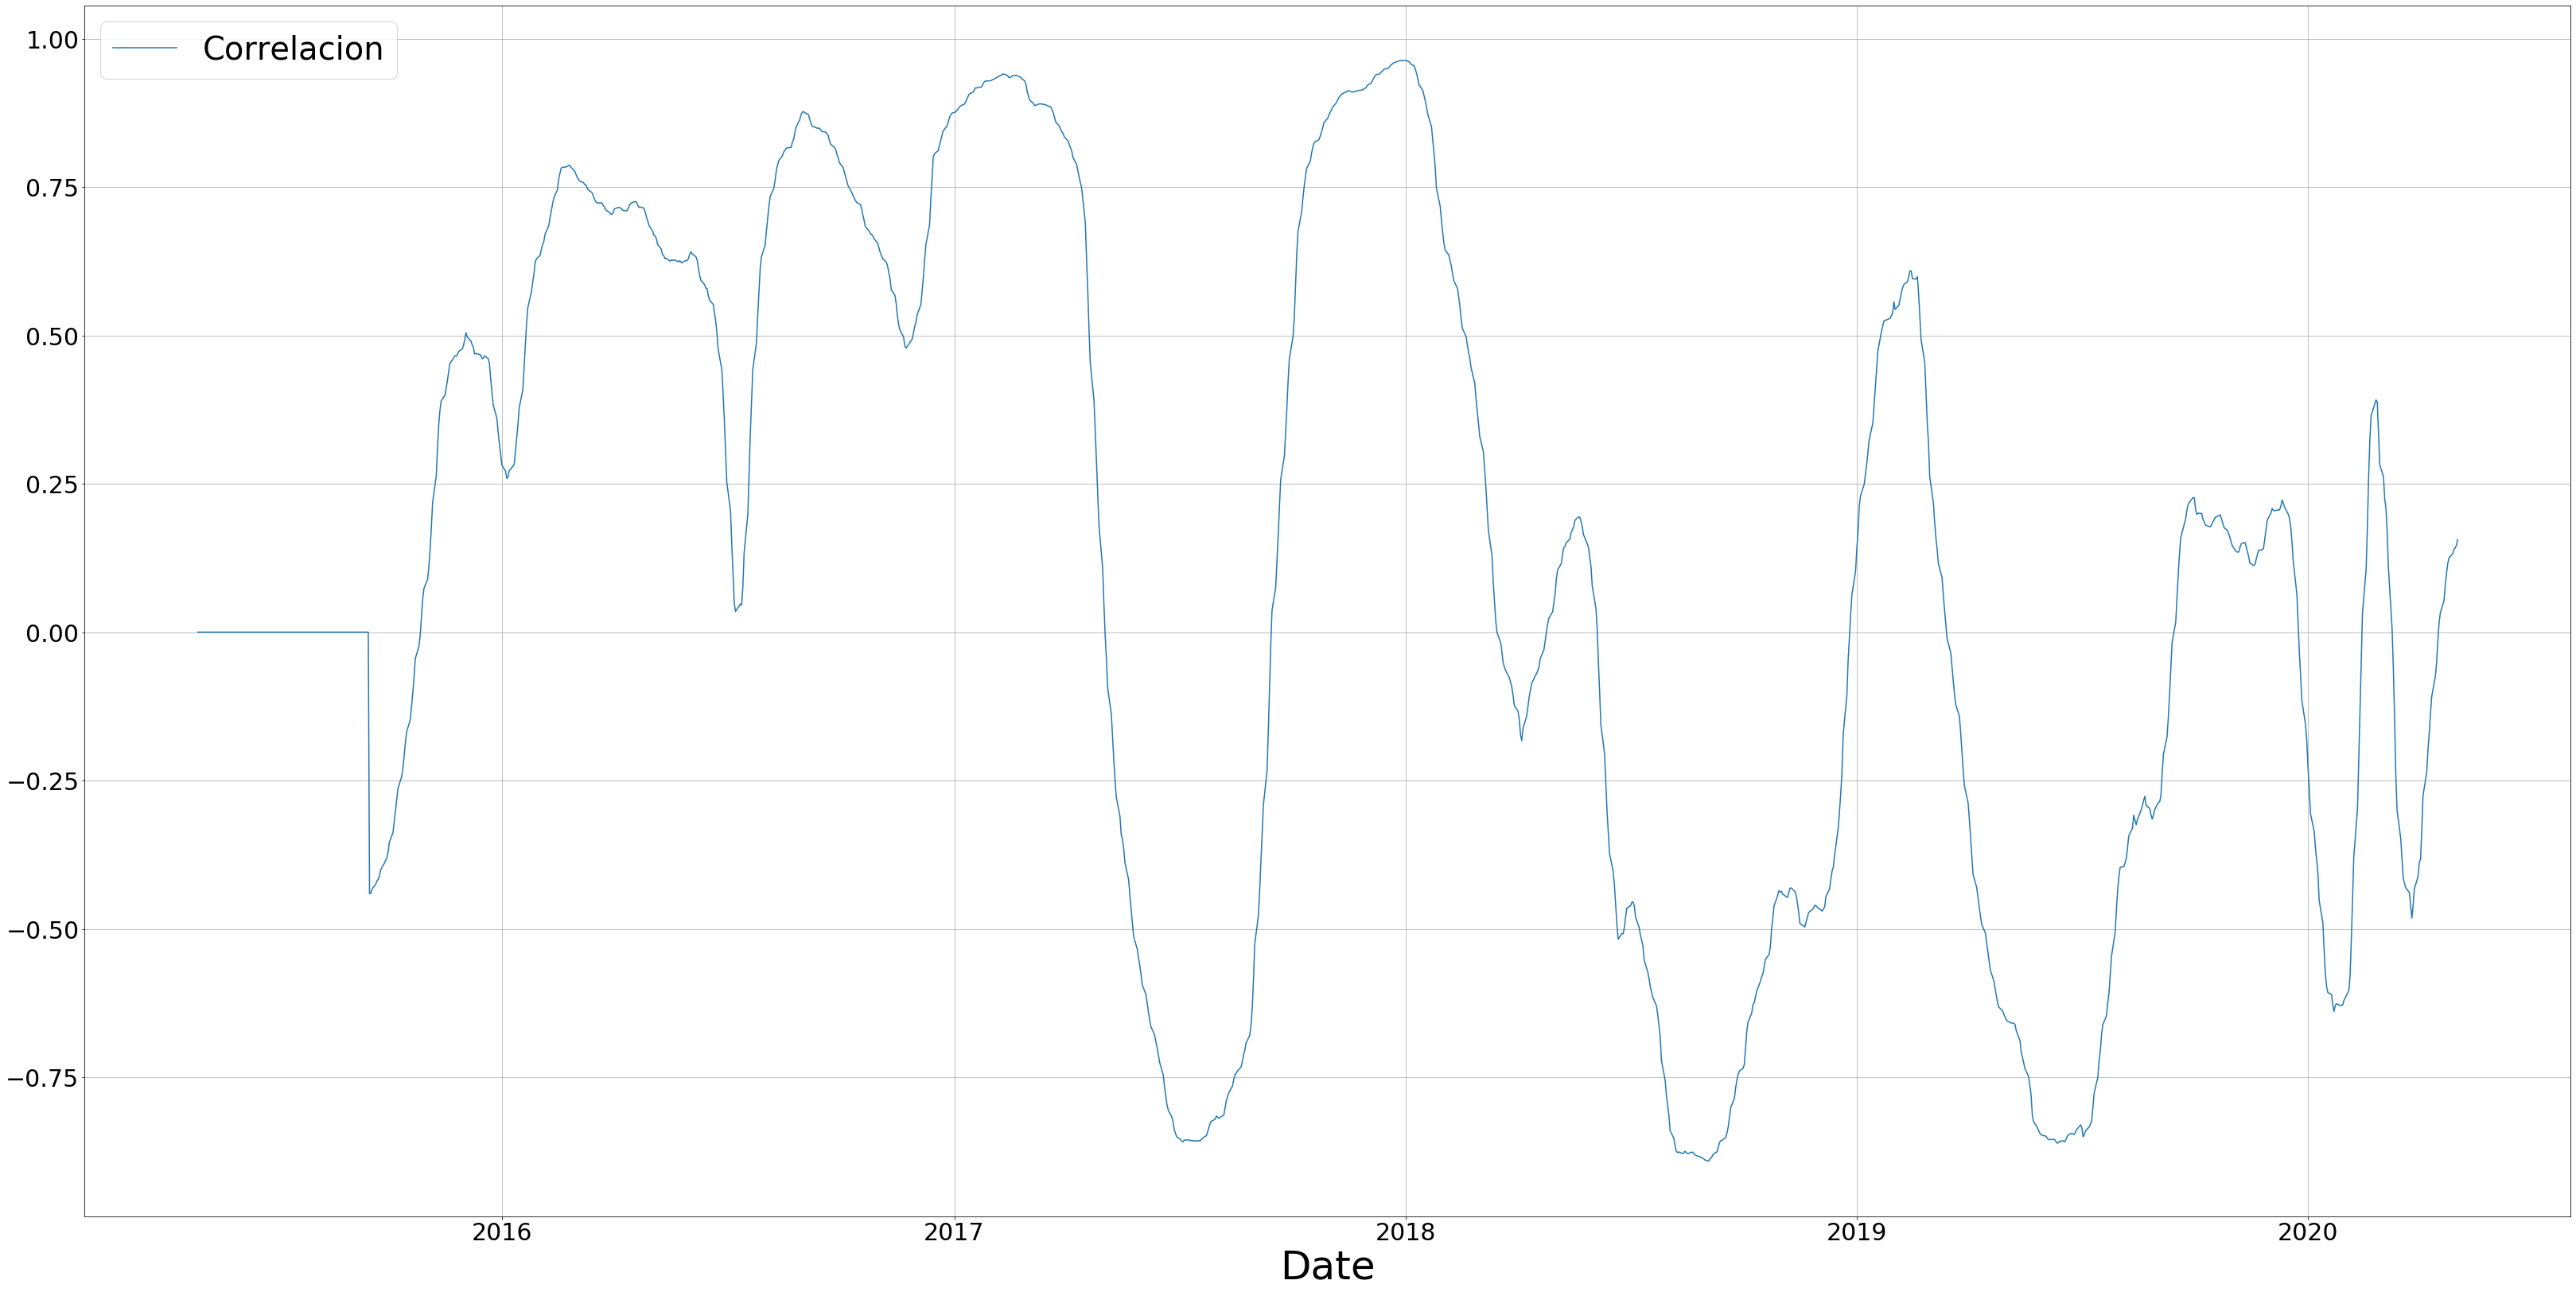

In [20]:
# Ploteo la correlacion

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(SP500_final["Correlacion"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Correlacion"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [21]:
# Ahora determino la señal


SP500_final['Señal'] = np.where((SP500_final.Correlacion>0)&(SP500_final.Citi>0),1, # Ambos mayores de cero
                          np.where((SP500_final.Correlacion>0)&(SP500_final.Citi<0),-1, # Uno mayor y otro menor de cero
                                  np.where((SP500_final.Correlacion<0)&(SP500_final.Citi>0),-1, # Uno menor y otro mayor de cero
                                          np.where((SP500_final.Correlacion<0)&(SP500_final.Citi<0),1,0)))) # Ambos menores de cero

In [22]:
# Visualizo una muestra

SP500_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal
Date,,,,,
2018-01-18,2479.376449,64.7,-0.161638,0.884939,1
2018-12-26,2186.666070,-15.4,4.959381,-0.009634,1
2019-04-04,2551.470768,-55.1,0.208464,-0.375637,1
2019-12-03,2740.931024,6.2,-0.663804,0.208356,1
2015-04-30,1848.001765,-62.2,0.000000,0.000000,0
2015-12-28,1822.295568,-31.2,-0.217856,0.360705,-1
2016-08-23,1937.844968,10.1,0.195176,0.825255,1
2018-11-19,2384.296306,8.8,-1.664309,-0.495388,-1
2019-04-24,2593.880234,-65.8,-0.219179,-0.614269,1


In [23]:
# Calculo el Profit & Loss

SP500_final['P&L'] = 100

for i in range(1, len(SP500_final)):
    
    SP500_final['P&L'].iloc[i] = SP500_final['P&L'].iloc[i-1] * (1 + SP500_final.Señal.iloc[i] *
                                                                 (SP500_final.Rentabilidad.iloc[i]/100))

In [24]:
# Visualizo una muestra

SP500_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L
Date,,,,,,
2016-02-12,1652.409593,-48.3,1.951801,0.731177,-1,110.873855
2017-12-13,2359.591419,63.4,-0.047295,0.944851,1,122.775376
2015-11-26,1850.979111,-16.1,0.000000,0.467203,-1,99.836063
2016-04-21,1853.291872,-22.5,-0.519406,0.715665,-1,98.548042
2015-08-03,1859.104786,-14.0,-0.275686,0.000000,0,100.000000
2019-12-25,2856.285479,-10.4,0.000000,-0.035546,1,133.685112
2017-11-10,2288.214853,38.5,-0.089762,0.906021,1,119.061477
2017-10-02,2241.091255,1.5,0.387400,0.498007,1,116.609520
2015-09-28,1667.464688,-23.8,-2.566612,-0.389438,1,95.130656


In [25]:
# Genero el Buy&Hold para hacer la comparación

SP500_final['Buy&Hold'] = 100

for i in range(1, len(SP500_final)):
    
    SP500_final['Buy&Hold'].iloc[i] = SP500_final['Buy&Hold'].iloc[i-1]*(1 + (SP500_final.Rentabilidad.iloc[i]/100))

In [26]:
# Visualizo una muestra

SP500_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L,Buy&Hold
Date,,,,,,,
2016-08-19,1935.160040,4.6,-0.144032,0.816187,1,101.857975,104.716352
2018-03-09,2469.221571,47.9,1.737880,0.171841,1,128.479704,133.615758
2017-05-16,2127.269779,-37.6,-0.068684,-0.340705,1,112.809037,115.111891
2017-08-02,2195.412025,-45.6,0.049266,-0.817333,1,116.422618,118.799239
2017-05-19,2110.486760,-33.4,0.676750,-0.387943,1,111.919034,114.203720
2019-09-10,2640.082272,7.0,0.032232,-0.142932,-1,135.270169,142.861458
2020-03-30,2327.514055,-1.5,3.351604,-0.411520,1,103.016746,125.947610
2016-08-02,1911.376712,15.8,-0.636159,0.675216,1,100.606130,103.429377
2018-08-06,2525.782293,-13.9,0.353830,-0.852815,1,139.032267,136.676400


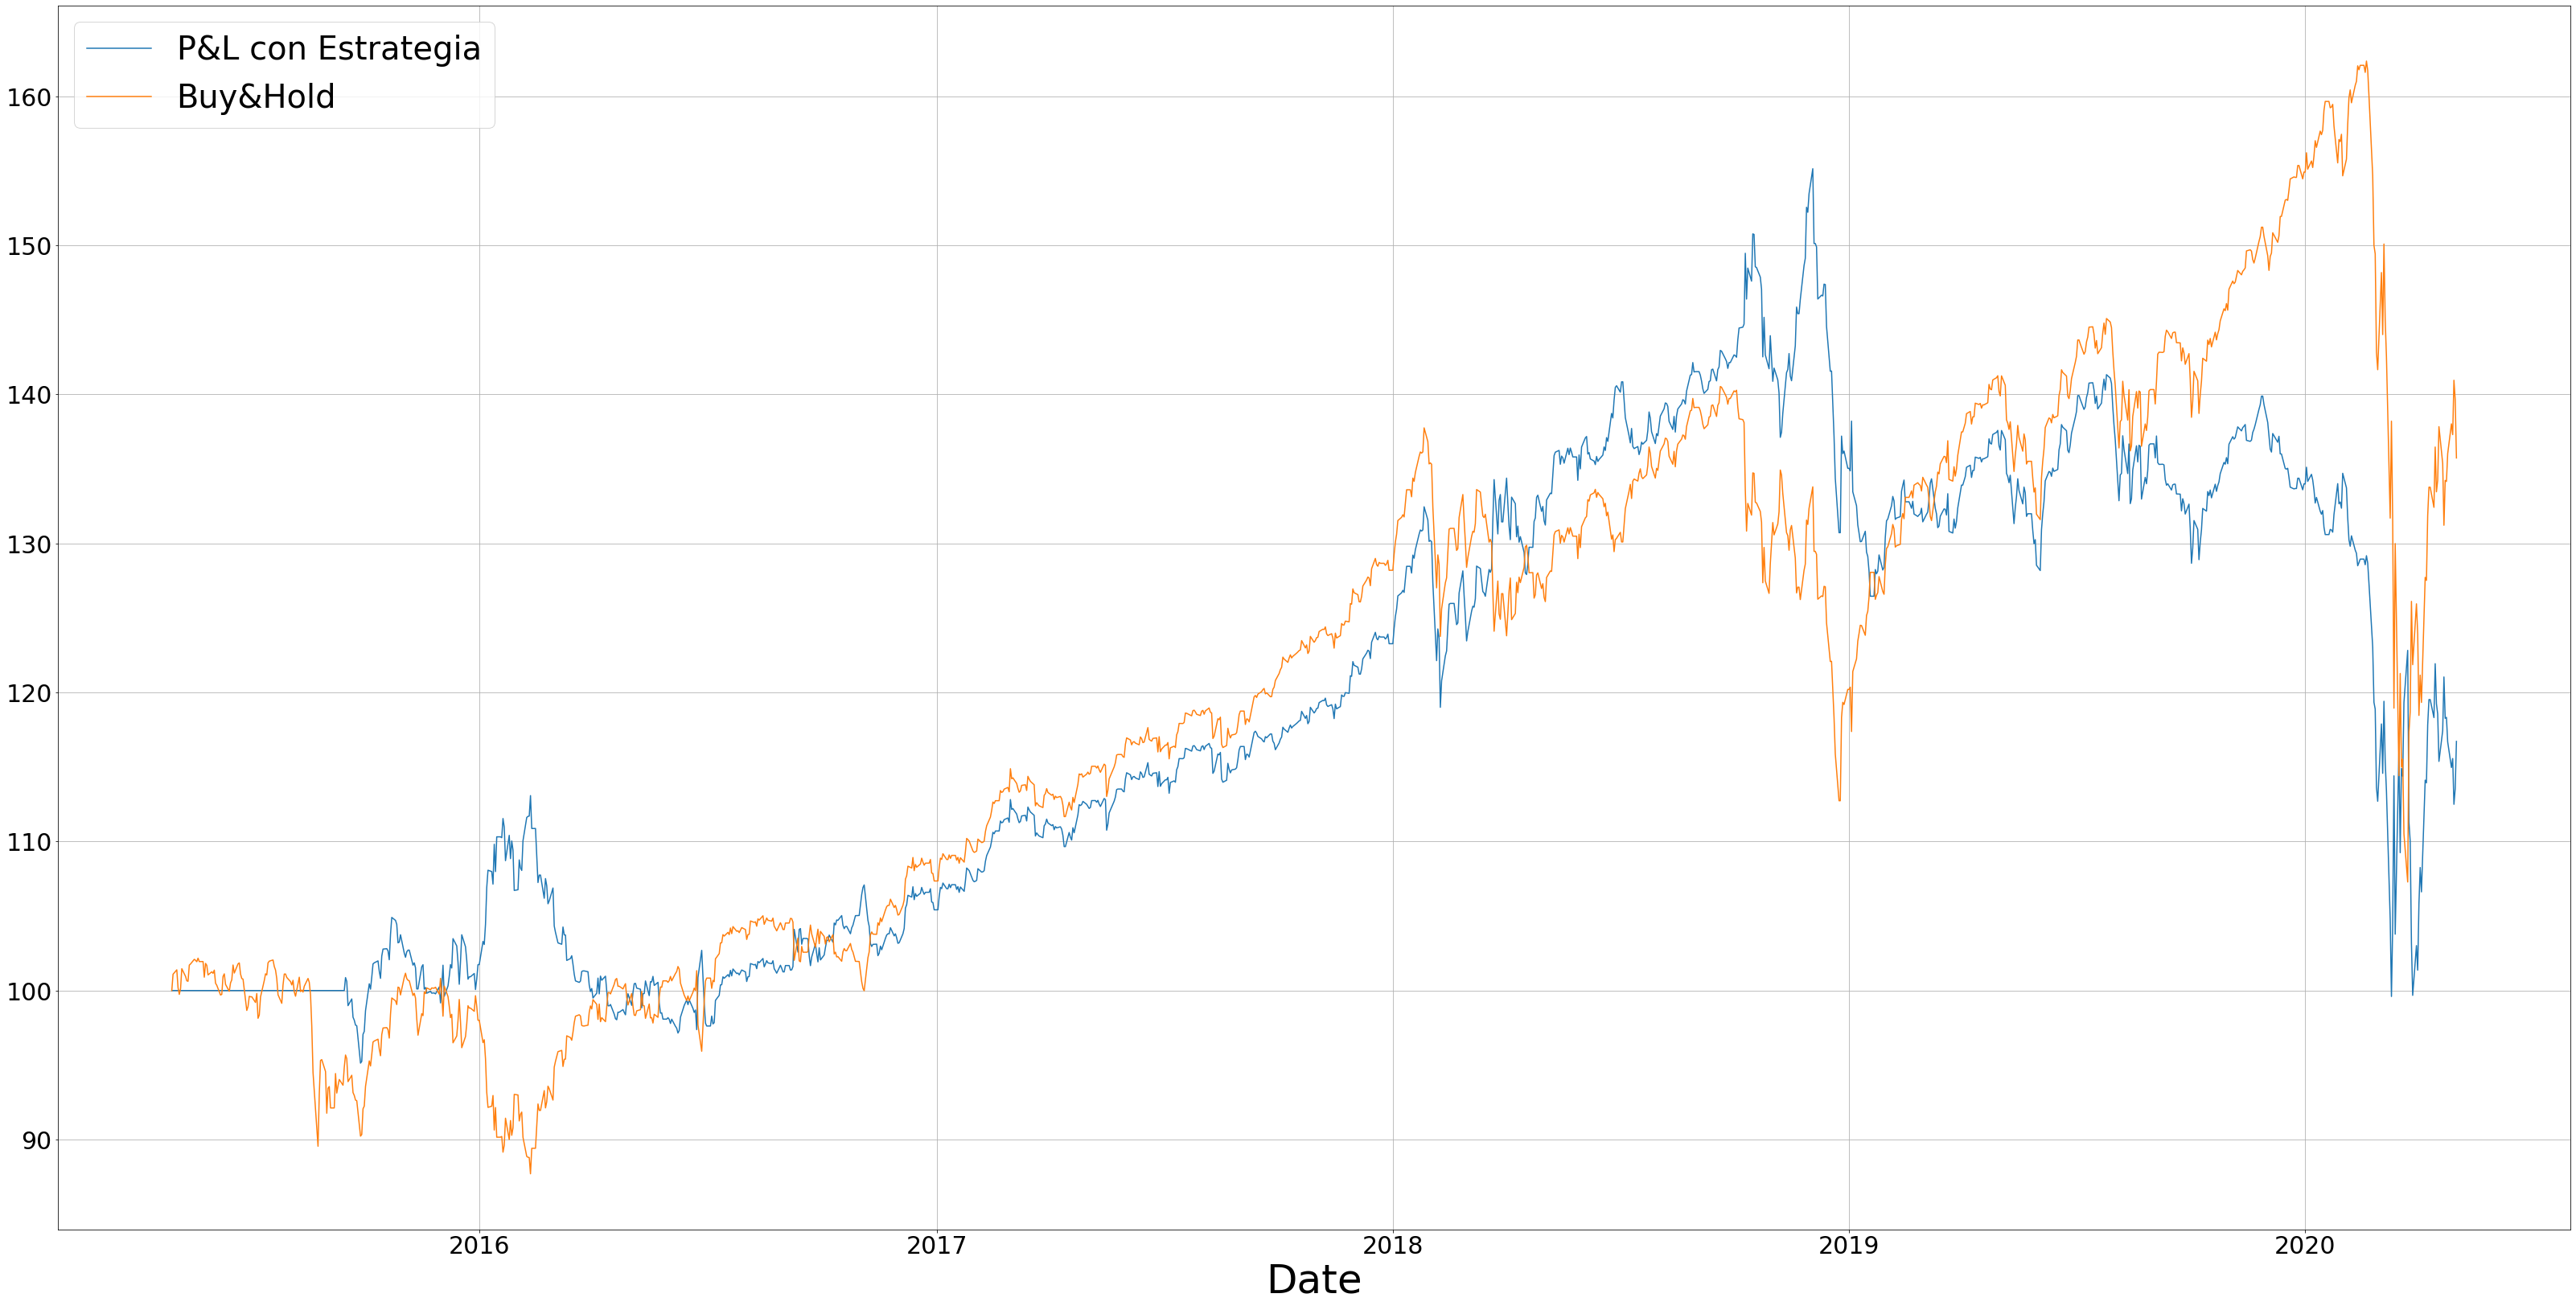

In [27]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(SP500_final["P&L"])
ax1 = plt.plot(SP500_final["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["P&L con Estrategia", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [28]:
SP500_citi = pd.DataFrame(SP500_final.loc[:, 'P&L'])
SP500_citi.columns = ['Indice_SP500']
SP500_citi

,Indice_SP500
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [29]:
SP500_citi.to_csv('./data_resultante/SP500_citi.csv')